In [97]:
#loading the required packages 
library(dplyr)
library(ggplot2)
library(gridExtra)
library(cowplot)
options(warn=-1)

#Extracting and storing all filenames that end with *.csv
filenames <- list.files(path="/Users/spandana/Desktop/Datacleaning/TEDS/recoded/",pattern="*.csv")
names <- substr(filenames,1,9)


#opening the csv files and assigning them to individual dataframes 
for(i in names){
    print(i)
    assign(i,read.csv(paste("/Users/spandana/Desktop/Datacleaning/TEDS/recoded/",i,"_PENN_recoded.csv",sep="")))
}


[1] "TEDS_2010"
[1] "TEDS_2011"
[1] "TEDS_2014"
[1] "TEDS_2016"
[1] "TEDS_2017"


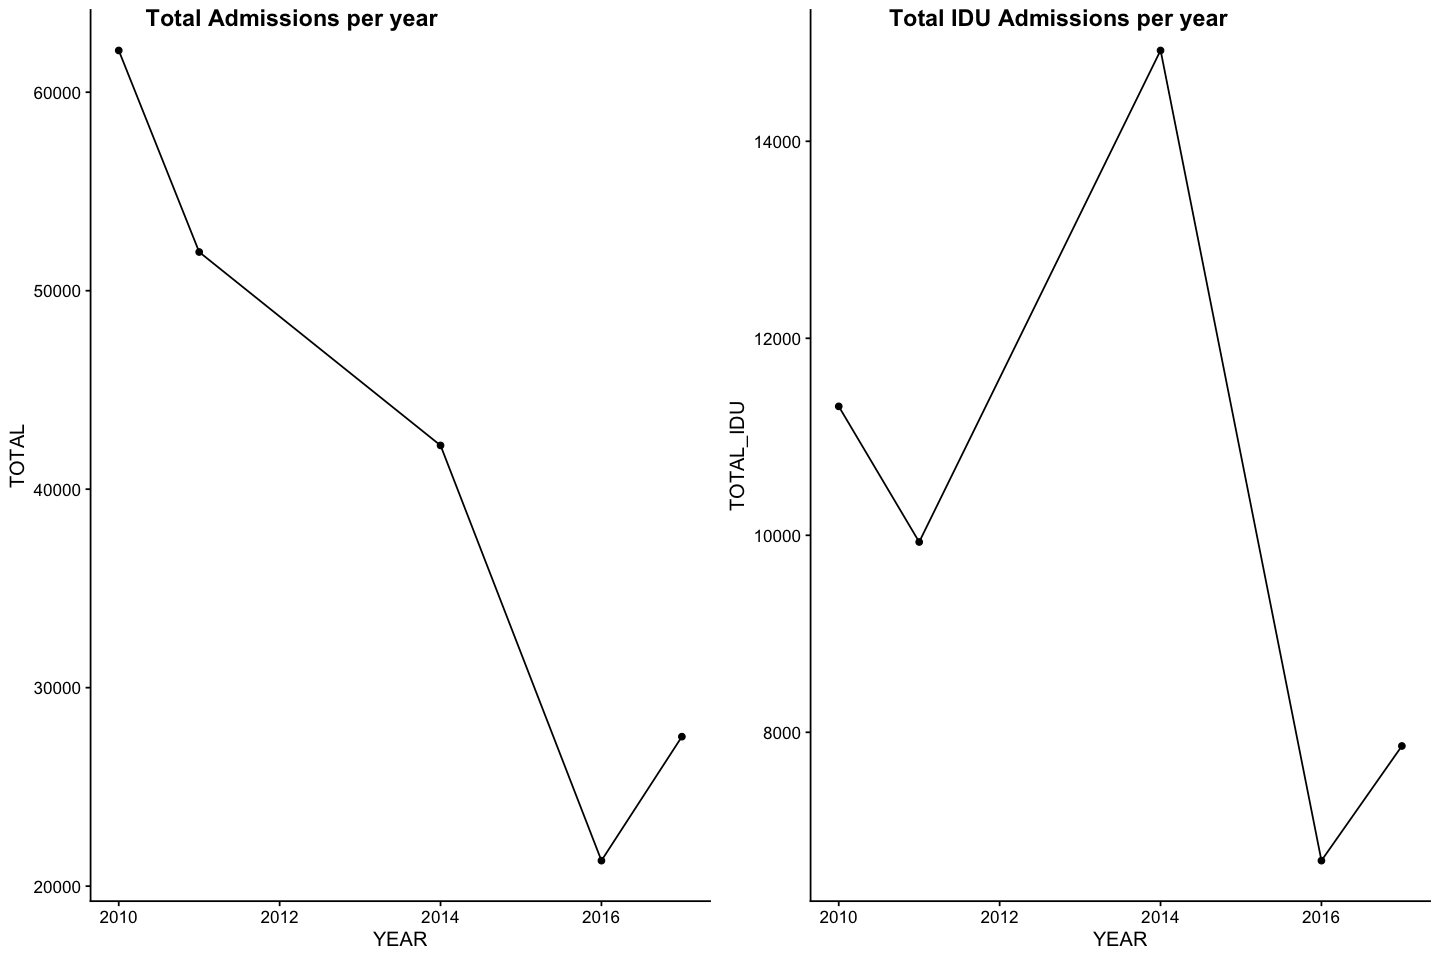

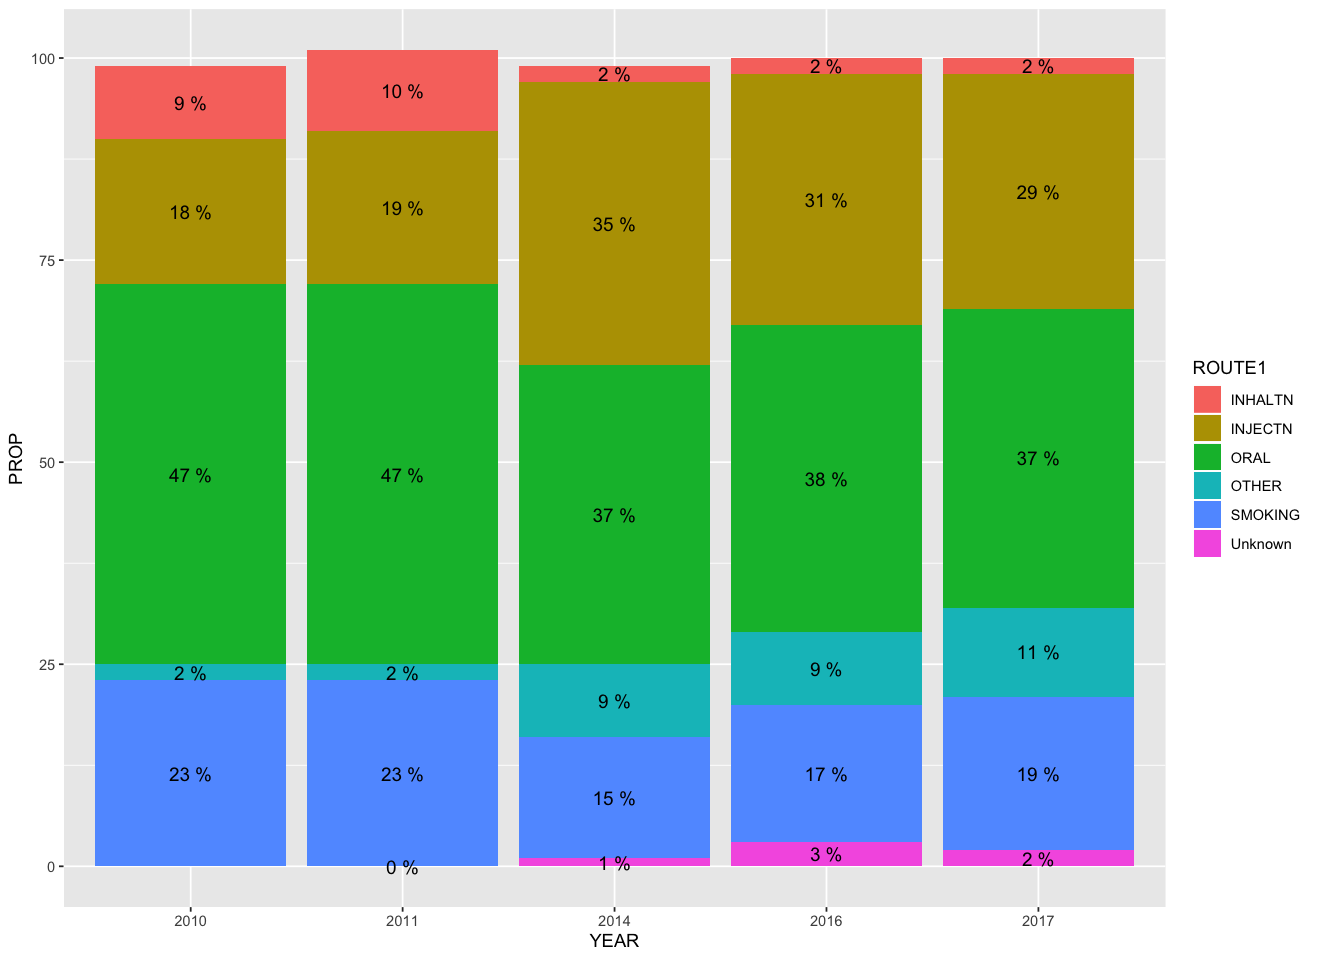

In [105]:
#extracting total admissions and users whose primary ROUTE is injection
total <- lapply(names,function(x){df<-get(x);df %>% filter(ROUTE1=="INJECTN") %>% group_by(YEAR) %>% summarize(TOTAL_IDU=n(),TOTAL=nrow(df))})
total_df <- as.data.frame(do.call(rbind,total))

options(repr.plot.width=12, repr.plot.height=8)
p1 <- ggplot(total_df,aes(x=YEAR,y=TOTAL))+geom_point()+geom_line()+theme_cowplot(12)
p2 <- ggplot(total_df,aes(x=YEAR,y=TOTAL_IDU))+geom_point()+geom_line()+theme_cowplot(12)  
plot_grid(p1,p2,labels=c("Total Admissions per year","Total IDU Admissions per year"))

#calculating % of all primary ROUTES
ROUTE1_year <- lapply(names_list,function(x){df <- get(x); df %>% group_by(ROUTE1) %>% summarize(primary= n(),PROP=round((n()/nrow(df))*100,digits=0),YEAR=first(YEAR))})
ROUTE1_year_df <- as.data.frame(do.call(rbind,ROUTE1_year))

options(repr.plot.width=11, repr.plot.height=8)
p3 <- ggplot(ROUTE1_year_df,aes(x=as.factor(YEAR),y=PROP,fill=ROUTE1))+geom_bar(position="stack",stat="identity")+
        labs(x="YEAR")+ geom_text(aes(label=paste(PROP,"%")),position=position_stack(vjust=0.5), size = 4, color = "black" )
p3

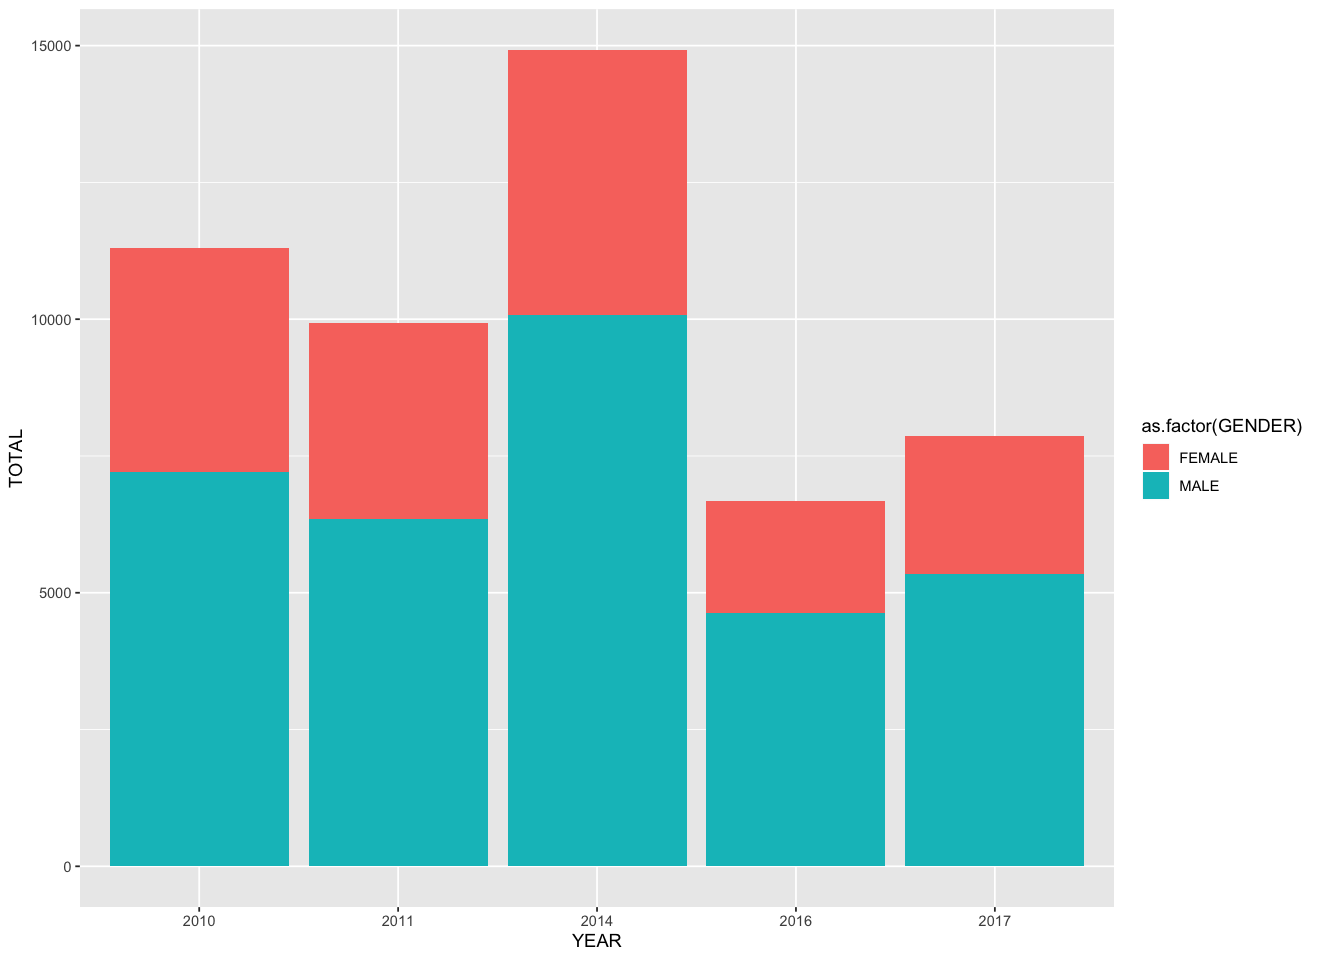

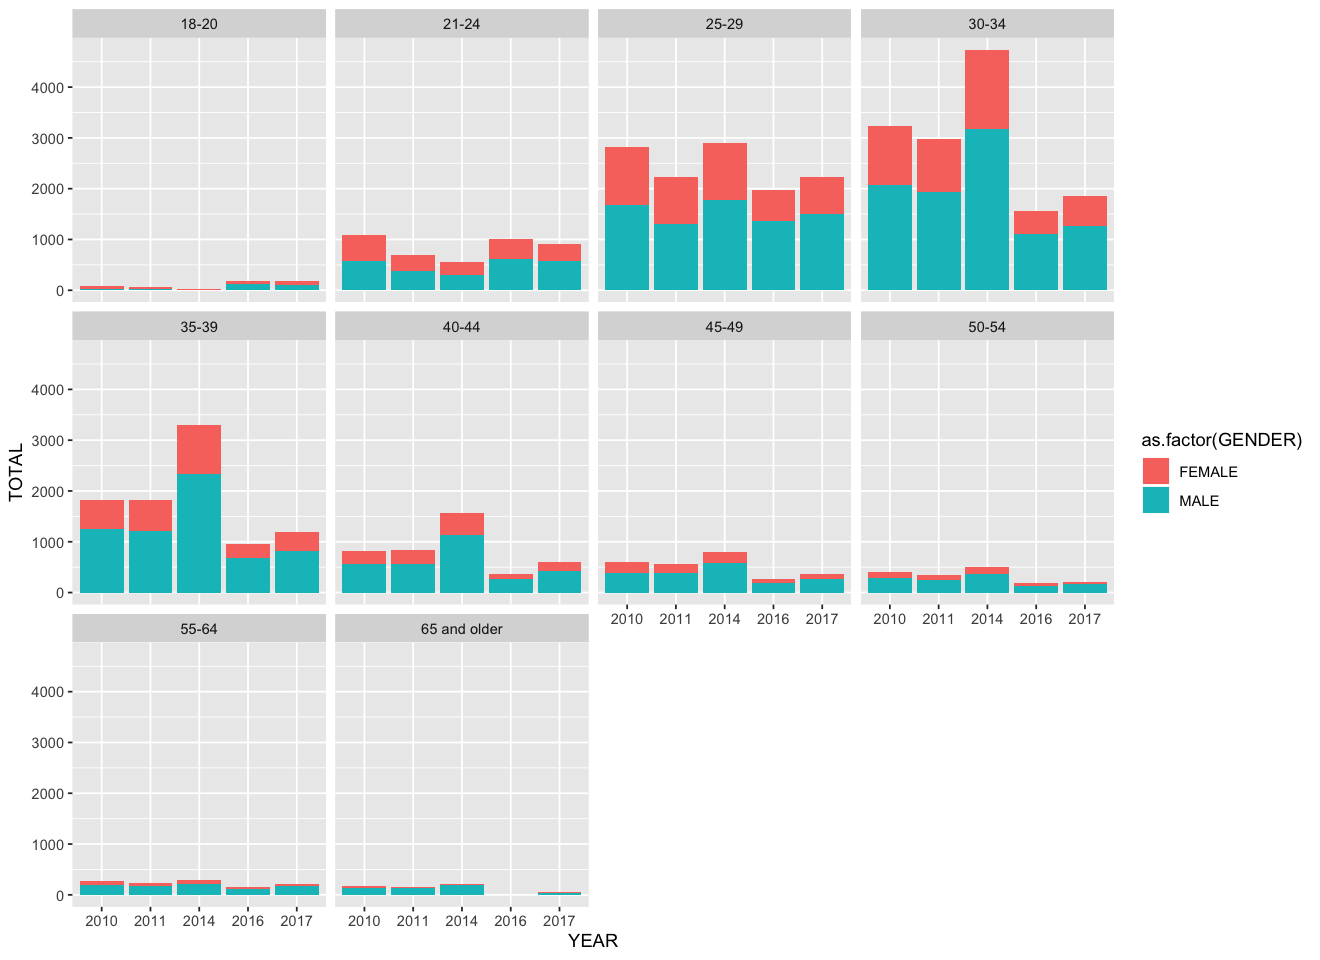

In [116]:
# Exploring relationship between Gender, Age, and Injection use 
options(warn=-1)
ROUTE1_IDU_GENDER <- lapply(names_list,function(x){df<-get(x);df%>% filter(ROUTE1=="INJECTN") %>% group_by(GENDER,AGE) %>% filter(n()>10) %>% summarize(YEAR=first(YEAR),TOTAL=n())})
ROUTE1_IDU_GENDER_df <- as.data.frame(do.call(rbind,ROUTE1_IDU_GENDER))
#ROUTE1_IDU_GENDER_df

p6 <- ggplot(ROUTE1_IDU_GENDER_df,aes(x=as.factor(YEAR),y=TOTAL,fill=as.factor(GENDER)))+labs(x="YEAR")+
        geom_bar(position="stack",stat="identity")

p7 <- ggplot(ROUTE1_IDU_GENDER_df,aes(x=as.factor(YEAR),y=TOTAL,fill=as.factor(GENDER)))+labs(x="YEAR")+
geom_bar(position="stack",stat="identity") +facet_wrap(~AGE)

p6
p7

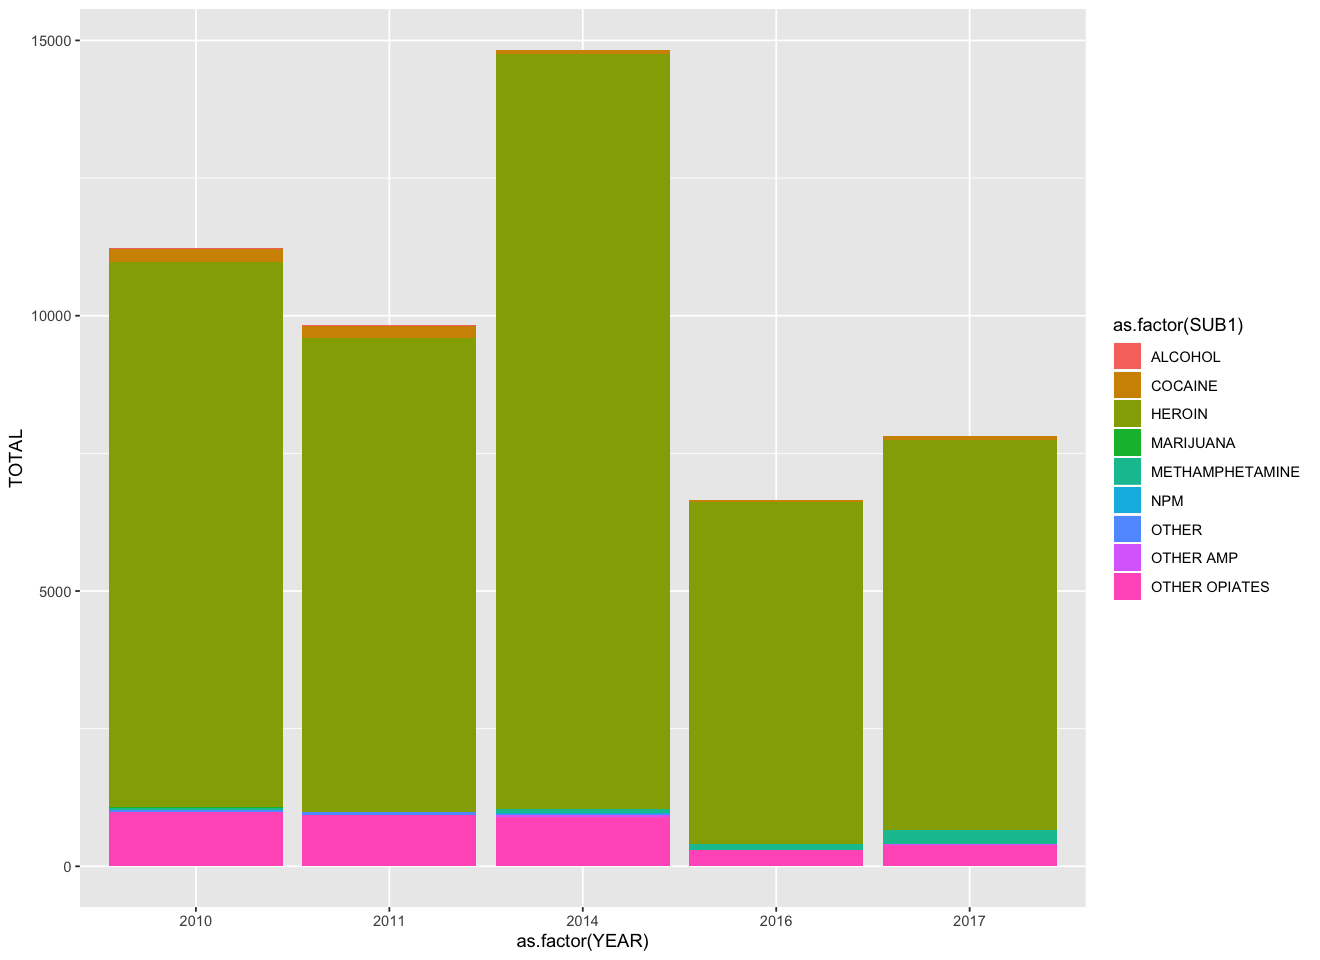

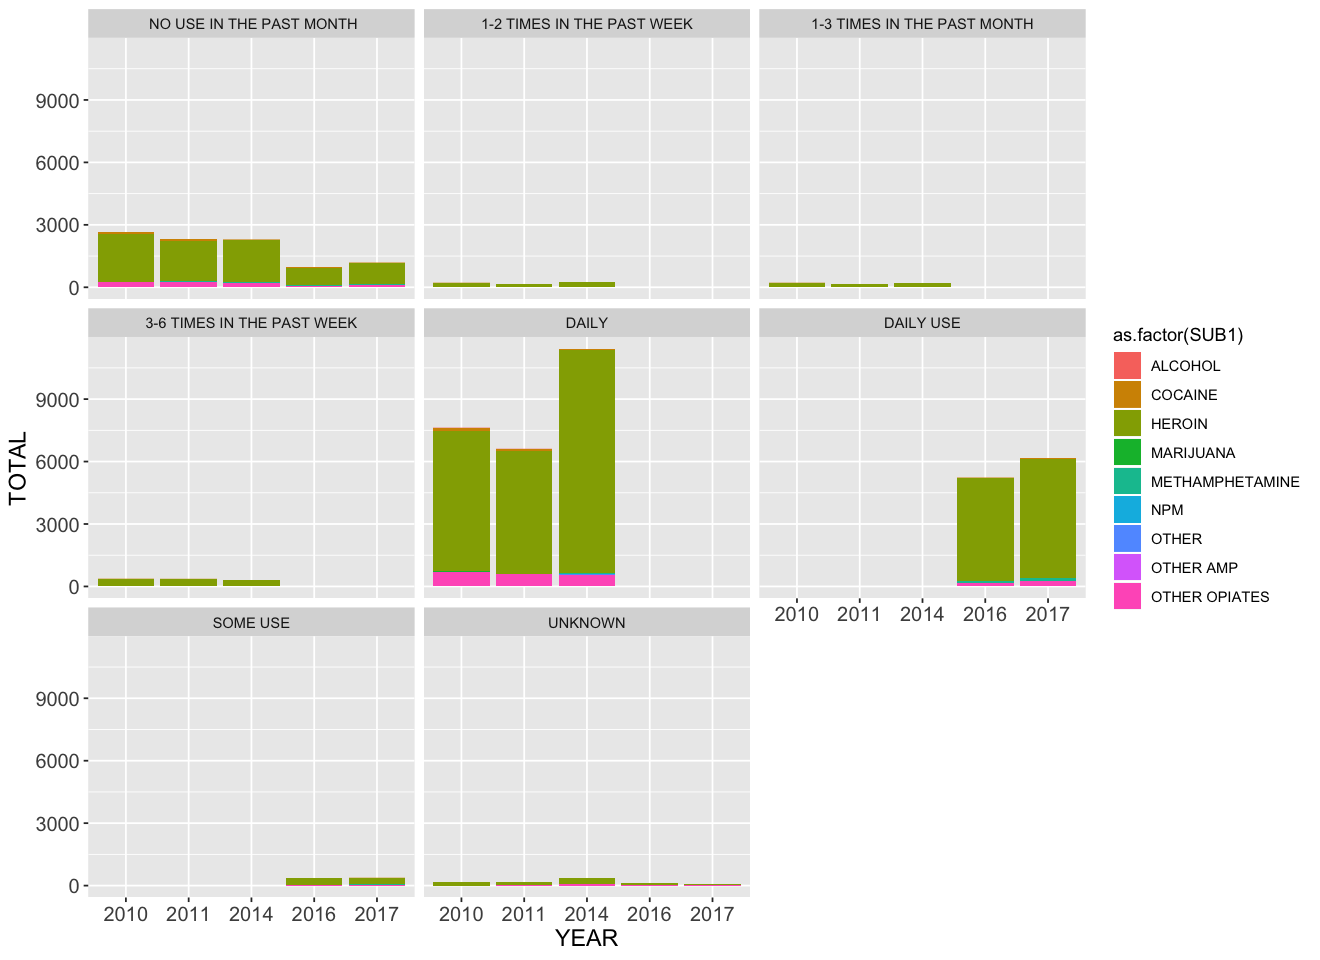

In [117]:
#Exploring the relationship between heroin use and Injection use
options(warn=-1)
ROUTE1_IDU_SUB <- lapply(names_list,function(x){df<-get(x);df%>% filter(ROUTE1=="INJECTN")%>% group_by(SUB1,FREQ1) %>% filter(n()>10) %>% summarize(TOTAL=n(),PROP=round((n()/sum(df$ROUTE1=="INJECTN"))*100,digits=1),YEAR=first(YEAR))})
ROUTE1_IDU_SUB_df <- as.data.frame(do.call(rbind,ROUTE1_IDU_SUB))
p4 <- ggplot(ROUTE1_IDU_SUB_df,aes(x=as.factor(YEAR),y=TOTAL,fill=as.factor(SUB1)))+geom_bar(position="stack",stat="identity")
p4

p5 <- ggplot(ROUTE1_IDU_SUB_df,aes(x=as.factor(YEAR),y=TOTAL,fill=as.factor(SUB1)))+
        geom_bar(position="stack",stat="identity")+facet_wrap(~FREQ1)+labs(x="YEAR")+
        theme(axis.text.x=element_text(size=12),axis.text.y=element_text(size=12),axis.title.x=element_text(size=14),axis.title.y=element_text(size=14))

p5

## In the plot above, since the code for daily use is different for years 2016 and 2017, they are plotted separately. Also, starting in 2016 they merged the 1-2/1-3/3-6 times use into some use.


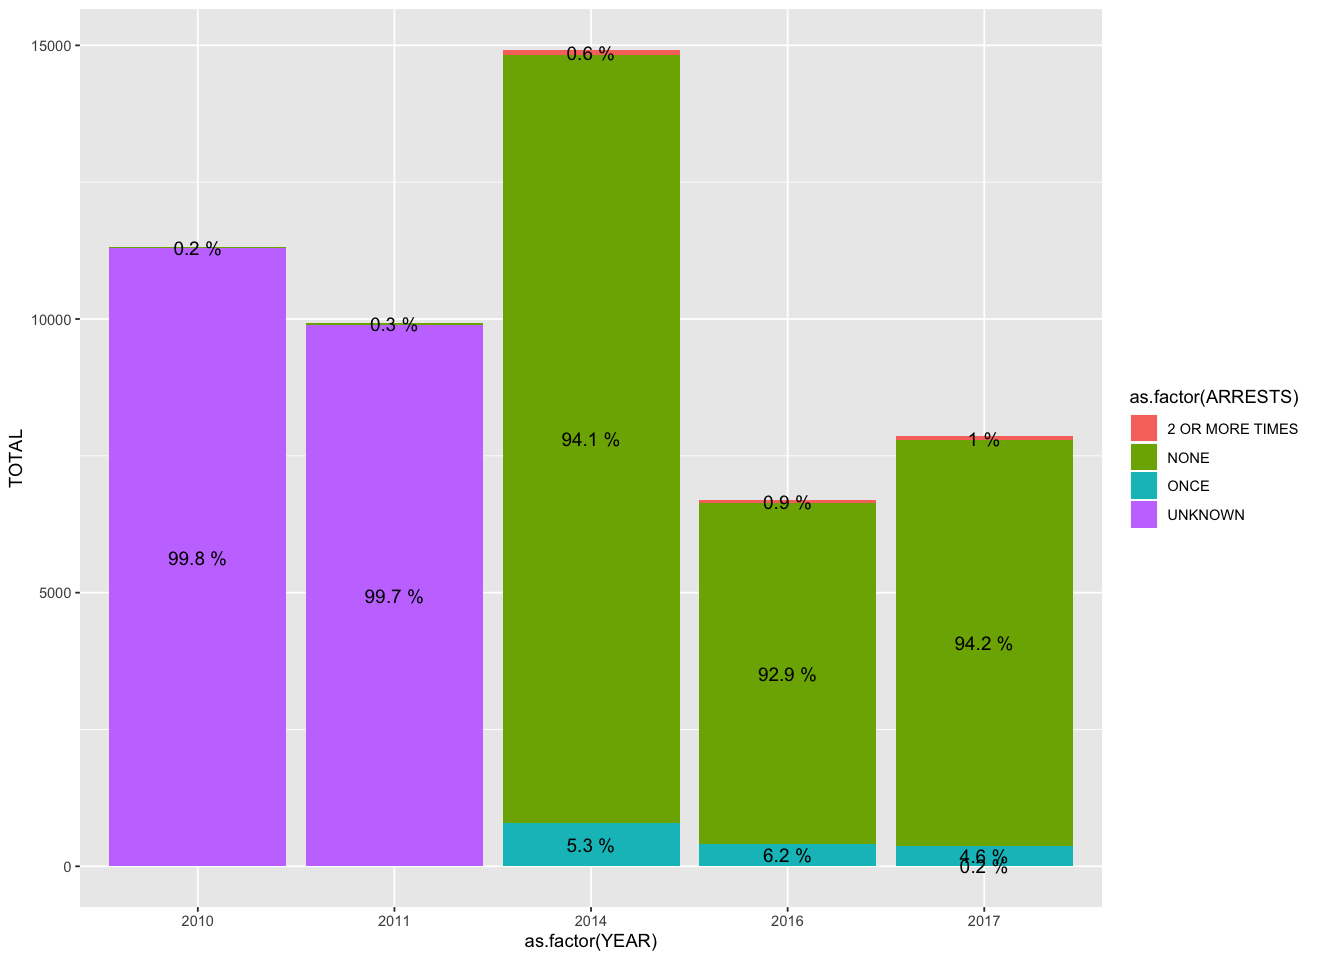

In [118]:
#IDU and arrests in the past 30 days. 

ROUTE1_IDU_ARRESTS <- lapply(names_list,function(x){df<-get(x);df%>% filter(ROUTE1=="INJECTN") %>% group_by(ARRESTS) %>% filter(n()>10) %>% summarize(YEAR=first(YEAR),TOTAL=n(),PROP=round((n()/sum(df$ROUTE1=="INJECTN"))*100,digits=1))})
ROUTE1_IDU_ARRESTS_df  <- as.data.frame(do.call(rbind,ROUTE1_IDU_ARRESTS))
ROUTE1_IDU_ARRESTS_df$ARRESTS <- recode(ROUTE1_IDU_ARRESTS_df$ARRESTS,`0`="NONE",`1`="ONCE",`2`="2 OR MORE TIMES",`-9`="UNKNOWN")

p6 <- ggplot(ROUTE1_IDU_ARRESTS_df,aes(x=as.factor(YEAR),y=TOTAL,fill=as.factor(ARRESTS)))+geom_bar(stat="identity",position="stack")+
geom_text(aes(label=paste(PROP,"%")),position=position_stack(vjust=0.5), size = 4, color = "black" )

p6

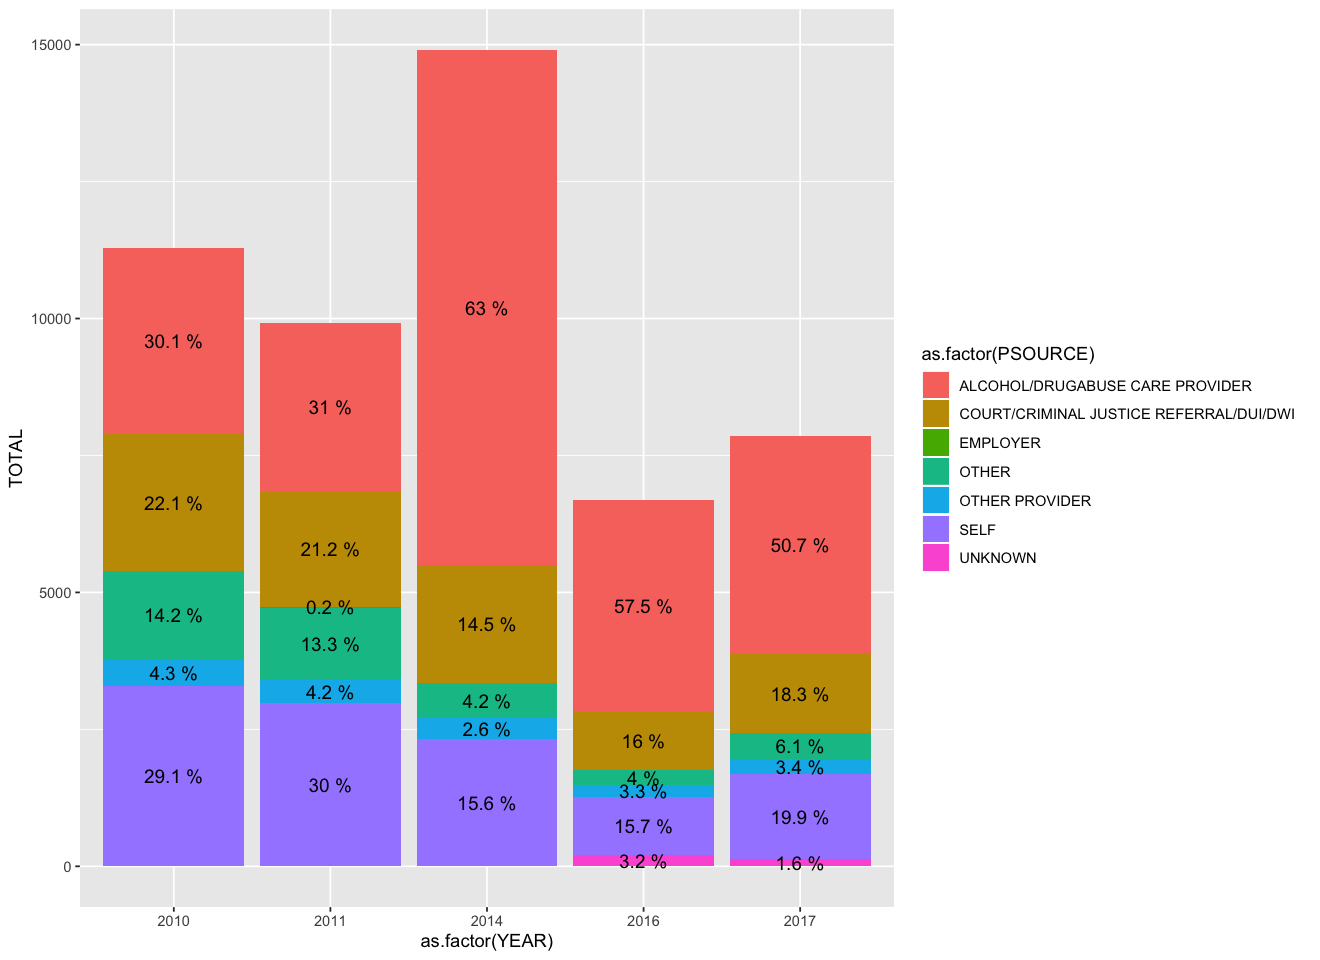

In [119]:
#IDU and REFERRALS 
#PSOURCE Describes the person or agency referring the client to the alcohol or drug abuse treatment program:
ROUTE1_IDU_REFERRALS <- lapply(names_list,function(x){df<-get(x);df%>% filter(ROUTE1=="INJECTN") %>% group_by(PSOURCE) %>% filter(n()>10) %>% summarize(YEAR=first(YEAR),TOTAL=n(),PROP=round((n()/sum(df$ROUTE1=="INJECTN"))*100,digits=1))})
ROUTE1_IDU_REFERRALS_df  <- as.data.frame(do.call(rbind,ROUTE1_IDU_REFERRALS))
ROUTE1_IDU_REFERRALS_df$PSOURCE <- recode(ROUTE1_IDU_REFERRALS_df$PSOURCE,`1`="SELF",`2`="ALCOHOL/DRUGABUSE CARE PROVIDER",`3`="OTHER PROVIDER",`4`="SCHOOL",`5`="EMPLOYER",`6`="OTHER",`7`="COURT/CRIMINAL JUSTICE REFERRAL/DUI/DWI",`-9`="UNKNOWN")
p7 <- ggplot(ROUTE1_IDU_REFERRALS_df,aes(x=as.factor(YEAR),y=TOTAL,fill=as.factor(PSOURCE)))+geom_bar(stat="identity",position="stack")+
    geom_text(aes(label=paste(PROP,"%")),position=position_stack(vjust=0.5), size = 4, color = "black" )

p7

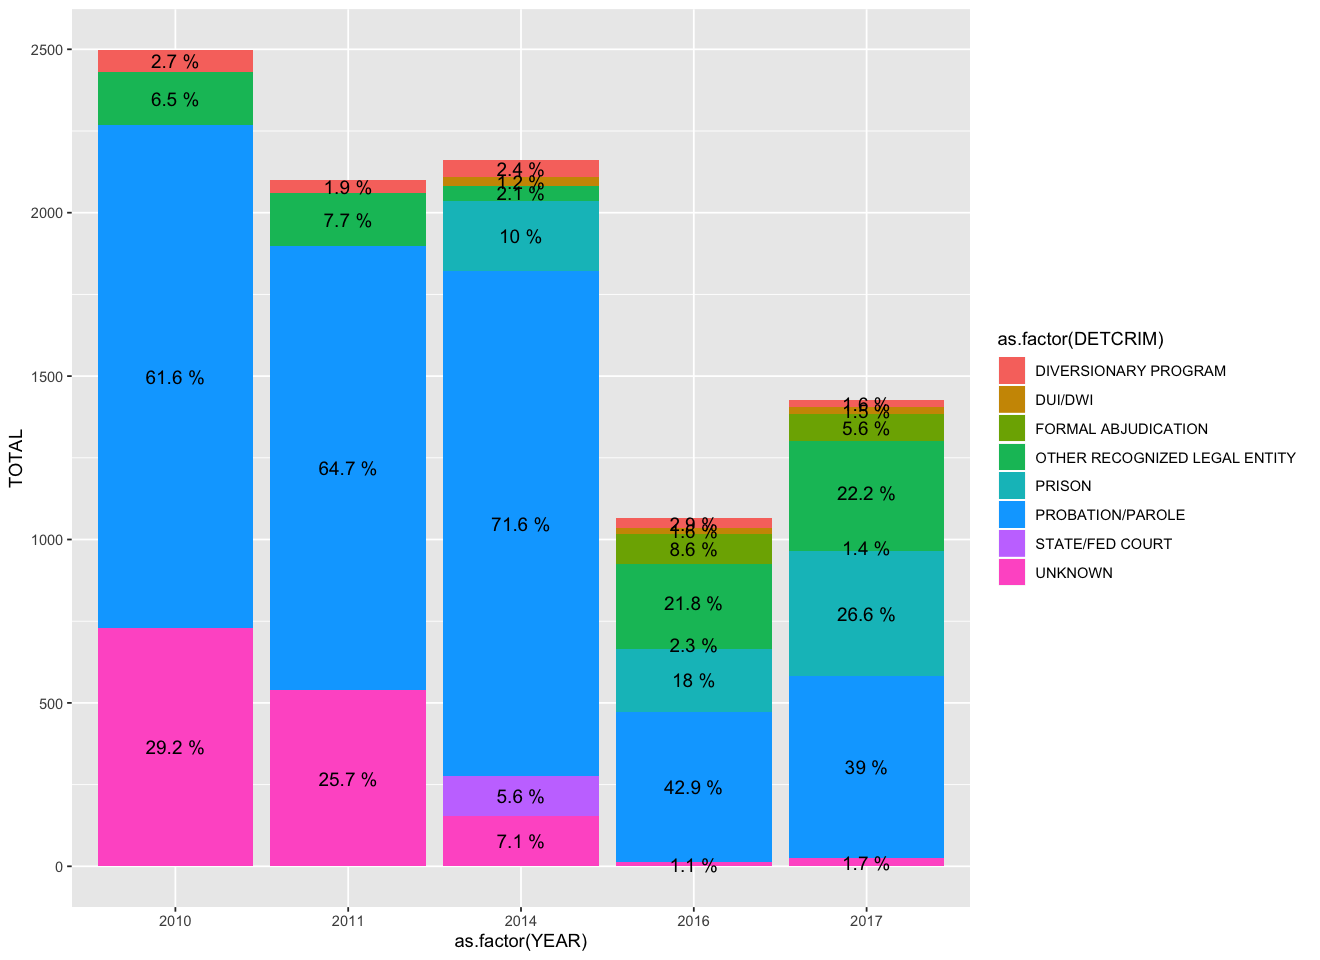

In [120]:
#IDU and DETCRIM REFERRAL
#This field gives more detailed information about those clients who are coded as "Criminal Justice Referral" in
#the Minimum Data Set field for "Principal Source of Referral" (PSOURCE plotted above)

#sum(TEDS_2010$ROUTE1=="INJECTN" & TEDS_2010$PSOURCE==7)
ROUTE1_IDU_DC<- lapply(names_list,function(x){df<-get(x);df%>% filter(ROUTE1=="INJECTN") %>% filter(PSOURCE==7) %>% group_by(DETCRIM) %>% filter(n()>10) %>% summarize(YEAR=first(YEAR),TOTAL=n(),PROP=round((n()/sum(df$ROUTE1=="INJECTN"&df$PSOURCE=="7"))*100,digits=1))})
ROUTE1_IDU_DC_df  <- as.data.frame(do.call(rbind,ROUTE1_IDU_DC))
ROUTE1_IDU_DC_df$DETCRIM <- recode(ROUTE1_IDU_DC_df$DETCRIM,`1`="STATE/FED COURT",`2`="FORMAL ABJUDICATION",`3`="PROBATION/PAROLE",`4`="OTHER RECOGNIZED LEGAL ENTITY",`5`="DIVERSIONARY PROGRAM",`6`="PRISON",`7`="DUI/DWI",`8`="OTHER RECOGNIZED LEGAL ENTITY",`-9`="UNKNOWN")
p8 <- ggplot(ROUTE1_IDU_DC_df,aes(x=as.factor(YEAR),y=TOTAL,fill=as.factor(DETCRIM)))+geom_bar(stat="identity",position="stack")+
     geom_text(aes(label=paste(PROP,"%")),position=position_stack(vjust=0.5), size = 4, color = "black" )
p8